## Extra credit - classes - Basically bioinformatics
### BIOINF 575 - Fall 2021

##### Total 50 points 

____

## Problem 1 - process genomic data to compute variant calls (50 points)

____
### The Data
A description of the provided data are:
1. `b_subtilis_genome.fa`: A [FASTA format](https://blast.ncbi.nlm.nih.gov/Blast.cgi?CMD=Web&PAGE_TYPE=BlastDocs&DOC_TYPE=BlastHelp) file containing the reference sequence for _B. subtilis_
    * A hallmark of the FASTA format is that the sequence header line precedes the sequences and always begins with a '>' character
1. `normal.bam`: A [BAM format](https://samtools.github.io/hts-specs/SAMv1.pdf) file that contains the simulated short reads for a "normal" _B subtilis_ sample
    * This is a very specialized format that needs special libraries to parse. However, just think of it as one read per line
1. `normal.bam.bai`: A BAM index file used for random access
1. `tumor.bam`: A [BAM format](https://samtools.github.io/hts-specs/SAMv1.pdf) file that contains the simulated short reads for a "tumor" _B subtilis_ sample
1. `tumor.bam.bai`: A BAM index file used for random access


<div style="background-color:#ffc680">
  <h3>Important Note</h3>
  <p>You will be using a special Python library for handling this data. This package is called BAMnostic.</p>
    <p><b>Before</b> doing this homework, you will need to install BAMnostic.  <br>  
        To do so, go to your terminal and type:<code>conda install -c conda-forge bamnostic</code></p> 
  <p>Consider taking a look at the <a href="https://bamnostic.readthedocs.io/en/latest/?badge=latest">BAMnostic documentation</a> for more information.</p>
</div>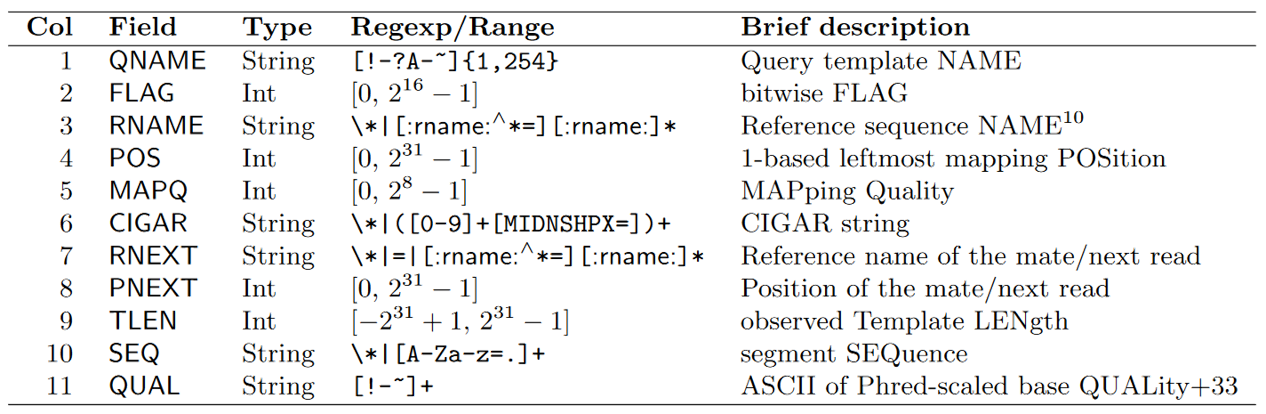

---
### Instructions

This homework is designed to be as close to real genomics research as you can get without the math/stats/research.   
**Given a set of genomic files you will compute the genomic variants between a tumor and a normal biological sample.**

You are tasked to serially process both the `normal.bam` and `tumor.bam` sample files.  

For each position on the genome, you will track:
   * the counts of each base observed at that position (`counts`)  
   * the consensus base at that position (`consensus`)   
   * the number of reads aligned at that position (`depth`)

The data structure you will be using is the Pileup class created in the classes_OOP.ipynb file during lecture and is also available in this file in a cell below.





```python
genome_positions = {"normal": [...], "tumor": [...]}

# The length of the two lists is the same and should be equal to the length of the sequence in the b_subtilis_genome.fa file
# Every element of the list will have the following data structure

genome_positions["normal"][0] = Pileup() 
# has counts = Counter()
# has consensus = ''
# has depth = 0 
    
```



Using `bamnostic` you will iterate through the files (`normal.bam` and `tumor.bam`) <b>one read at a time. </b>   
This is set up so that you do not have to worry about dealing with `bamnostic` directly.  
You should only have to handle the `read` object.


<div style="background-color:#ffc680">
  <h3>Important Note</h3>
    <p>You <b>only</b> need to use <code>read.seq</code> and <code>read.pos</code> to complete this assignment</p>
    <p>You <b>do not</b> have to consider other read attributes (<em>qualities, flags, or CIGAR strings</em>) at this time</p>
</div>

---
## Fill in the code for the following functions

In [10]:
from collections import Counter
import bamnostic as bs

### You should be able to use this class as is, but feel free to improve it

In [11]:
class Pileup:
    """
    Contains a counter of nulceotides aligned at a genomic position and 
    computes depth and consensus for a genomic position
    
    Attributes:
    counts (Counter):  counter of all nucleotides aligned at the genomic position
    depth (int): total number of reads aligned at the genomic position
    consensus (str): most common nucleotide
    """
    
    
    def __init__(self, counts = None):
        self.counts = counts
        if self.counts == None:
            self.counts = Counter()
        self.depth = sum(self.counts.values())
        if self.depth == 0:
            self.__consensus = ""        
        else:
            self.__consensus = self.counts.most_common()[0][0]

    @property # getter
    def consensus(self):
        """
        Get the consensus nucleotide for the pileup
        """
        return self.__consensus
    
    # @set.consensus # property setter
    # def consensus(self, cons):
    #    self.__consensus = consensus
        

    def __str__(self):  #self is a variable name. the first paramter is always the object. Convention is self bz it talks about itself (the object)
        #refers to itself. It will NOT refer to the class, you have to have an object. 
        return f"Pileup({self.counts},{self.depth})"
    
    def __repr__(self):
        return f"Pileup({self.counts}, Consensus: '{self.consensus}')"
    
    def __add__(self, p):
        c = self.counts.copy()
        c.update(p.counts)
        return Pileup(c)
        
        
    def update(self, seq):
        """
        Update the counts depth and consensus nucleotide for the pileup
        given new nucleotides to add to the pileup
        """
        self.counts.update(seq)
        self.depth = sum(self.counts.values())
        self.__consensus = self.counts.most_common()[0][0]




### The cells below were used for exploration of the class Pileup with my notes.

In [12]:
p = Pileup() #creates an object. 

In [13]:
print(p)

Pileup(Counter(),0)


In [5]:
# help(dir)

In [8]:
# dir(p) #display info related 

In [14]:
help(Pileup.consensus) #it is a property due to @property. 

Help on property:

    Get the consensus nucleotide for the pileup



In [15]:
help(Pileup.update) #is a function, look at the cell with class defintion. 

Help on function update in module __main__:

update(self, seq)
    Update the counts depth and consensus nucleotide for the pileup
    given new nucleotides to add to the pileup



In [16]:
help(Pileup.counts) #we get an error because it is not a property or method, it's just an attribute (had no @properity) 

AttributeError: type object 'Pileup' has no attribute 'counts'

In [17]:
p.consensus

''

In [18]:
p.depth = 5 #I can set the depth 

In [19]:
p.depth

5

In [20]:
p.consensus = 5 #I cannot set the consensus, due to it being read only. 

AttributeError: can't set attribute

In [21]:
p

Pileup(Counter(), Consensus: '')

In [22]:
p.update("ACTGCGTCTG")

In [23]:
p

Pileup(Counter({'C': 3, 'T': 3, 'G': 3, 'A': 1}), Consensus: 'C')

In [24]:
p.update("ACTGCGCCTG")

In [25]:
p

Pileup(Counter({'C': 7, 'G': 6, 'T': 5, 'A': 2}), Consensus: 'C')

In [26]:
p.counts

Counter({'A': 2, 'C': 7, 'T': 5, 'G': 6})

In [27]:
p.consensus

'C'

In [28]:
p.depth

20

In [29]:
p1 = Pileup
p1 #this is the class. 

__main__.Pileup

In [30]:
seq = "ACT"

In [31]:
type(list) 

type

In [32]:
[1,2,3] #these are both lists, and can append, indexing, basically have general properities of lists. 

[1, 2, 3]

In [33]:
["test", "here we are", 4]

['test', 'here we are', 4]

In [34]:
type(Pileup)

type

In [35]:
type(list()) #these are objects. 

list

In [36]:
list()

[]

In [37]:
Pileup() #creates a pileup object

Pileup(Counter(), Consensus: '')

In [38]:
t = (4,5,6)

In [39]:
l = [1,2,3]

In [40]:
t[0]

4

In [41]:
l[0]

1

In [42]:
t[0] = 10 #tuple is only readable, so the first index remains the first value. 

TypeError: 'tuple' object does not support item assignment

In [43]:
l[0] = 10  #this is because the list is readable and writable. So the first index was updated to the value of 10. 

In [44]:
l

[10, 2, 3]

---
#### Fill in the code for the following 4 functions

#### (10 points) FUNCTION 1 - Initialize the genome_positions  - fill in the code missing in the following cell
   `initialize_positions`:
   * Input:
        * genome filename
   * Output:
        * initialized `genome_positions`  object

#### Details and score breakdown:
- The length of the two lists (values for the keys 'normal' and 'tumor' ) is the same and should be equal to the length of the sequence 
     in the genome_filename (b_subtilis_genome.fa) file
- After calling this function, the normal and tumor lists should contain a Pileup() for each position
- In this function 
     - <b>(1 points)</b> open the file and 
     - <b>(1 points)</b> go through it line by line 
     - <b>(3 points)</b> if the line is a sequence line (does not start with >) go through the characters in the line
     - <b>(5 points)</b> for each character (except for the newline character) add an empty Pileup() in the normal and tumor list
         - consider that the last character in the line might be a newline character '\n' - which is not a nucleotide in the sequence

In [45]:
# Initialize the genome_positions 
# This can be tested with a small text file that contains a small (10-100 nucleotides) 
# sequence before going to the large B. subtilis file.
# Make sure you run the import before you try to test this code
# from collections import Counter

#NOTE: the code was taken from the hw6_solution notebook. 

def initialize_positions(genome_filename):
    genome_positions = {'normal':[], 'tumor':[]}
    # fill in the code
    
    # open file for reading 
    with open(genome_filename) as genome_file:
        # read the first line and ignore it, does not contain nucleotides
        genome_file.readline() 
        # go through the rest of the lines in the file
        for line in genome_file:
            # go through the nucleotides in a line
            # use strip to remove the newline that is at the end of each line
            for nc in line.strip():
                # 
                genome_positions['normal'].append(Pileup())  
                genome_positions['tumor'].append(Pileup())

    return genome_positions

In [51]:
#testing function #1 below. 
from collections import Counter
genome_positions = initialize_positions("b_subtilis_genome.fa")

In [47]:
len(genome_positions['normal'])

4215606

In [48]:
#Pileup already had the counter as one of its attributes. 
g1 = genome_positions['normal'][:3]
g1

[Pileup(Counter(), Consensus: ''),
 Pileup(Counter(), Consensus: ''),
 Pileup(Counter(), Consensus: '')]

In [49]:
genome_positions['tumor'][:3]

[Pileup(Counter(), Consensus: ''),
 Pileup(Counter(), Consensus: ''),
 Pileup(Counter(), Consensus: '')]

.....................................


#### (15 points) FUNCTION 2 - Process a read - fill in the code missing in the following cell

  `process_read`:
   * Input:
        * read_pos: The position whare the read aligns
        * read_seq: The sequence of the read
        * Sample name (`'normal'` or `'tumor'`)
        * `genome_positions`
   * Output: 
        * The modified `genome_positions`


#### Details and score breakdown:
- <b>(3 points)</b> Go through the read sequence (read.seq) and update the genome_positions value for the sample_name (which will be tumor or normal)
- <b>(4 points)</b> Update the list at the positions starting with the position given by read.pos (attribute of the read object that tells us where the read aligned)
- For each nucleotide in the sequence:
    * <b>(8 points)</b> update the pileup for the respective positions

- E.g.: Let's assume sample_name is normal and read.pos is 5 and read.seq is AGCT
     - Use the the genome_positions dictionary and get the value for the key 'normal' which is a list
     - Make updates to the Pileup element from the list at position 5 which is a Pileup object 
         - Add A to the Pileup
     - Move to the next nucleotide in the read sequence 'G', which aligns at position 6 and follow the update process described  above.
     - Continue to go through the sequence and make similar updates to the dictionaries that are in the list at positions 7 and 8 and use the next nucleotides from the read sequence T and C  



In [50]:
# Process a read
# Make sure you run the import before you try to test this code
# from collections import Counter

def process_read(read_pos, read_seq, sample_name, genome_positions = None):
    # fill in the code
    
    # we align each nucleotide i nthe read sequence
    # at positions in the genome starting with read_pos
    # and ending with read_pos + len(red_seq)
    for i in range(len(read_seq)):
        # get the dictionary at the current position
        # pos_dict = genome_positions[sample_name][i]
        # add the nucleotide to the counter
        genome_positions[sample_name][i + read_pos].update(read_seq[i])
        # pos_dict["normal"].update(read_seq)
        # update consensus

    return genome_positions

In [52]:
#testing function #2 below. 
gen_pos = {'normal': [Pileup(), Pileup(), Pileup(), Pileup(), Pileup()], 
           'tumor': [Pileup(), Pileup(), Pileup(), Pileup(), Pileup()]
          }
gen_pos

{'normal': [Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: '')],
 'tumor': [Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: '')]}

In [53]:
gp = process_read(0, "AGCT", "normal", gen_pos)

In [54]:
gp

{'normal': [Pileup(Counter({'A': 1}), Consensus: 'A'),
  Pileup(Counter({'G': 1}), Consensus: 'G'),
  Pileup(Counter({'C': 1}), Consensus: 'C'),
  Pileup(Counter({'T': 1}), Consensus: 'T'),
  Pileup(Counter(), Consensus: '')],
 'tumor': [Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: ''),
  Pileup(Counter(), Consensus: '')]}

In [55]:
gp["normal"][0].consensus

'A'

In [56]:
gp = process_read(0, "TTCTG", "tumor", gen_pos)
gp

{'normal': [Pileup(Counter({'A': 1}), Consensus: 'A'),
  Pileup(Counter({'G': 1}), Consensus: 'G'),
  Pileup(Counter({'C': 1}), Consensus: 'C'),
  Pileup(Counter({'T': 1}), Consensus: 'T'),
  Pileup(Counter(), Consensus: '')],
 'tumor': [Pileup(Counter({'T': 1}), Consensus: 'T'),
  Pileup(Counter({'T': 1}), Consensus: 'T'),
  Pileup(Counter({'C': 1}), Consensus: 'C'),
  Pileup(Counter({'T': 1}), Consensus: 'T'),
  Pileup(Counter({'G': 1}), Consensus: 'G')]}

In [57]:
gp = process_read(0, "AGCT", "tumor", gen_pos)

In [58]:
gp

{'normal': [Pileup(Counter({'A': 1}), Consensus: 'A'),
  Pileup(Counter({'G': 1}), Consensus: 'G'),
  Pileup(Counter({'C': 1}), Consensus: 'C'),
  Pileup(Counter({'T': 1}), Consensus: 'T'),
  Pileup(Counter(), Consensus: '')],
 'tumor': [Pileup(Counter({'T': 1, 'A': 1}), Consensus: 'T'),
  Pileup(Counter({'T': 1, 'G': 1}), Consensus: 'T'),
  Pileup(Counter({'C': 2}), Consensus: 'C'),
  Pileup(Counter({'T': 2}), Consensus: 'T'),
  Pileup(Counter({'G': 1}), Consensus: 'G')]}

.....................................


#### (5 points) FUNCTION 3 - Process a bam file - fill in the code missing in the following cell

 `process_bam`: 
   * Input: 
        * filename to be processed
        * Sample name (`'normal'` or `'tumor'`)
        * `genome_positions`
   * Output:
        * The modified `genome_positions` given that specific sample


#### Details and score breakdown:
- Go through the bam file one read at a time (done already) and 
    - <b>(5 points)</b> process the read

In [59]:
# Process file - make sure you run the import before you try to test this function
# import bamnostic as bs
def process_bam(filename, sample_name, genome_positions = None):
    # the following line of code opens the .bam alignment file 
    # and puts all the reads in the object named bam
    with bs.AlignmentFile(filename) as bam:
        for read in bam:
            # fill in your code 
            # call the function process_read for the current read
            process_read(read.pos, read.seq, sample_name, genome_positions)
            
    return genome_positions

.....................................


#### (20 points) FUNCTION 4 - Process the updated genomic data collected in genome_positions and create variant calls

 `process_genomic_data`:
   * Input: 
        * `genome_positions` 

```python
#E.g.: genome_positions
{'normal':[Pileup(counts = Counter({'A': 5, 'C':2, 'G':7}))], 
 'tumor':[Pileup(Counter({'A': 2, 'C':9, 'G':3, 'T':1}))]}
```

   * Output: 
        * The summarized variants as a `list` of `tuples`: `(pos, cons_tumor, cons_normal, alelle_freq)`

```python
#E.g. variant_calls
[(0,'C','G',0.6)]
```

#### Details and score breakdown:

When you have finished processing the files, you will need to produce a second `list` of `tuples` (variant_calls) using the  process_data function.  

The data a `tuple`s in the variants list must contain are: `(pos, cons_tumor, cons_normal, alelle_freq)`
1. The position of the variant
1. The variant base
1. The reference base
1. The allele frequency of the variant base (counts of variant base calls/total base counts at the given position)
    - counts of variant base calls = counts of the consensus in tumor (at the given position)
    - total base counts = total counts of all bases (ACGT) in tumor (at the given position)

An element (tuple) is added to the list if and only if the following conditions is met:
> There is a different consensus base in the tumor sample versus the normal sample at the same position   
More than half of the bases aligned at that position in the tumor sample suport the consensus

    
- <b>(5 points)</b> Go though the elements of the list that is the value for the 'normal' key of the genome_positions dictionary
    - you also want the position that you can use access the same place in the tumor list so you should use enumerate to get both
- For each element: 
    - <b>(8 points) 
        - Check if there is a different consensus base in the tumor sample versus the normal sample at the same position
        - More than half of the bases aligned at that position in the tumor sample suport the consensus
    - <b>(5 points)</b> Build a variant call tuple using data from the normal sample at the respective position      
    (`genome_positions['normal'][pos]`) and the corresponding element (at the same position) in the value for the 'tumor' key (`genome_positions['tumor'][pos]`)  
    - <b>(2 points)</b> add tuple to the `variant_calls` list.

In [60]:
# Process genomic data
# This can be tested with a small made-up genome_positions dictionary
def process_data(genome_positions = None):
    variant_calls = []
    # fill in the code

    for i, val_norm in enumerate(genome_positions['normal']):
        val_tumor = genome_positions['tumor'][i]
        cons_tumor = val_tumor.consensus 
        cons_norm = val_norm.consensus 
        if (cons_tumor != '' and cons_norm != '' and cons_tumor != cons_norm):
            freq_cons = val_tumor.counts[cons_tumor]/val_tumor.depth
            if freq_cons > 0.5:
                variant_calls.append((i, cons_tumor, cons_norm, freq_cons))
    return variant_calls

In [61]:
gp = {'normal':[Pileup(counts = Counter({'A': 5, 'C':2, 'G':7}))], 
 'tumor':[Pileup(Counter({'A': 2, 'C':9, 'G':3, 'T':1}))]}

In [62]:
gp

{'normal': [Pileup(Counter({'G': 7, 'A': 5, 'C': 2}), Consensus: 'G')],
 'tumor': [Pileup(Counter({'C': 9, 'G': 3, 'A': 2, 'T': 1}), Consensus: 'C')]}

In [63]:
process_data(gp)

[(0, 'C', 'G', 0.6)]

---
#### This is to run all the code together after all functions are completed. 
#### The following cells should work if all the code above works.

#### I recommend to try a test with a small genome file (100 nucleotides or so) 

In [65]:
# This will take some time to run for the file provided -- 10 min
# Make sure you run the import before you try to test this code
# from collections import Counter
# import bamnostic as bs

# Initialize the list
genome_positions = initialize_positions('b_subtilis_genome.fa')

# Process all the bam files
for filename in ('normal.bam', 'tumor.bam'):
    genome_positions = process_bam(filename, filename.split('.')[0], genome_positions)

# Process the results
results = process_data(genome_positions)

# Display the first 10 variant calls
results[:10]


FileNotFoundError: [Errno 2] No such file or directory: 'normal.bam'

In [ ]:
len(results)

In [ ]:
len(genome_positions["normal"])

______________

__________